In [1]:
from keras.models import model_from_json
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from ipykernel import kernelapp as app
import os
from keras.models import Sequential, Model 

from math import *
import random

from keras import backend as K

# model layers helpers
from keras.layers import Activation, Dropout, Flatten, Dense, ZeroPadding2D, Conv2D, Input, MaxPooling2D
from keras.optimizers import Adam, SGD
from keras import regularizers
from keras.regularizers import l2
from keras.utils.np_utils import to_categorical

# pre trained models
from keras.applications.vgg19 import VGG19

# image processing
from keras.preprocessing.image import img_to_array, ImageDataGenerator, load_img

from sklearn import model_selection

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from skimage import io


# Deep Learning libraries 
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn

Using TensorFlow backend.


In [2]:
LABELS = {0: 'Audi_78', 1: 'BWM_81', 2: 'Benz_77', 3: 'Toyota_39', 4: 'Volkswagen_73'}
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

def load_model(compile_model=False):
    # load json and create model
    json_file = open('/Users/ihaider/Downloads/Thesis/results/model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("/Users/ihaider/Downloads/Thesis/results/model.h5")
    print("Loaded model and weights from disk")
    
    if(compile_model):
        # compile the model 
        loaded_model.compile(loss = "categorical_crossentropy", optimizer = SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
        print("\nModel compiling done..")
    
    return loaded_model

################################
# LOADING TRAINED MODEL WEIGHTS
################################
loaded_model = load_model(compile_model=True)


####################################
# TEST IMAGES PROCESSING FUNCTIONS
# IMAGES OUTSIDE STANFORD DATA SCOPE
####################################
def fetch_prepare_image_from_url(url, car_model="N/A"):
    # load an image from file
    img = io.imread(url)
    img = img.astype("float32")
    img /= float(255)
    img = cv2.resize(img, (IMAGE_HEIGHT,IMAGE_WIDTH))
    print("Image resize to: " + str(img.shape))
    
    # show image
    plt.imshow(img)
    plt.title(car_model)
    plt.show()
    
    return img


# re-sizing images
def resize_image(img_name, car_model="N/A"):
    root_path = "/Users/ihaider/PycharmProjects/datasets/testing_data/"
    
    # load an image from file
    img = Image.open(root_path+img_name)
    img = img.resize((IMAGE_HEIGHT,IMAGE_WIDTH), Image.ANTIALIAS)
    img = np.array(img)
    
    # show image
    plt.imshow(img)
    plt.title(car_model)
    plt.show()

    return img

Loaded model and weights from disk

Model compiling done..


In [3]:
def predict(model_name):
    #img_url="https://i.imgur.com/hGpfrc5.jpg"
    # {0: 'Audi_78', 1: 'BWM_81', 2: 'Benz_77', 3: 'Toyota_39', 4: 'Volkswagen_73'}
    
    img_name = model_name

    image = resize_image(img_name=img_name, car_model=model_name)

    images = np.array([image])
    print(images.shape)

    prediction = loaded_model.predict(images)
    predicted = np.argmax(prediction, axis=1)

    print("Model predicted given image as: " + LABELS.get(predicted[0]))


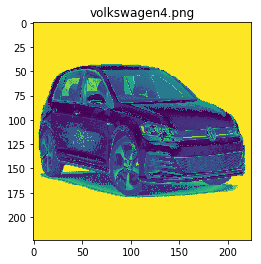

(1, 224, 224)


ValueError: Error when checking input: expected input_1 to have 4 dimensions, but got array with shape (1, 224, 224)

In [6]:
model_name="volkswagen4.png"
predict(model_name)